# 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Federal Reserve Economic Data

### 1. Importing your libraries and data

In [5]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [6]:
%matplotlib inline

In [7]:
path=r'/Users/nikolinastekovic/Library/CloudStorage/OneDrive-Personal/CF DATA ANALYICS/Immerse/6-Advanced Analytics and Dashboard Design'

In [8]:
# Import the sustainable energy data

data = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'global-data-on-sustainable-energy_clean.csv'), index_col = False)

In [9]:
data.head(5)

,Unnamed: 0,Country,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,0,Afghanistan,2000,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,3.400000,13283.800000,60,652230.0,33.93911,67.709953
1,1,Afghanistan,2001,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,3.400000,13283.800000,60,652230.0,33.93911,67.709953
2,2,Afghanistan,2002,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,3.400000,179.426579,60,652230.0,33.93911,67.709953
3,3,Afghanistan,2003,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,4,Afghanistan,2004,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [10]:
data.shape

(3648, 19)

In [11]:
data.columns

Index(['Unnamed: 0', 'Country', 'Year',
       'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita',
       'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude', 'Longitude'],
      dtype='object')

### 2. Subsetting, wrangling, and cleaning time-series data

In [129]:
# Create table of German Energy Intensity Level from 

data_2 = data.loc[(data['Country'] == 'Germany')]

In [130]:
data_2.head()

,Unnamed: 0,Country,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
1281,1281,Germany,2000,100.0,100.0,3.70,367.22,169.61,35.47,35.834354,48903.700,4.00,830280.0000,2.912503,23635.92922,240,357022.0,51.165691,10.451526
1282,1282,Germany,2001,100.0,100.0,3.90,372.69,171.30,37.90,35.951813,49841.387,4.05,847680.0000,1.681468,23607.88286,240,357022.0,51.165691,10.451526
1283,1283,Germany,2002,100.0,100.0,4.41,372.64,164.84,44.48,35.968105,49257.790,3.97,833380.0049,-0.197974,25077.72908,240,357022.0,51.165691,10.451526
1284,1284,Germany,2003,100.0,100.0,5.44,390.81,165.06,46.67,35.139576,49300.902,3.99,836789.9780,-0.700117,30243.57653,240,357022.0,51.165691,10.451526
1285,1285,Germany,2004,100.0,100.0,6.34,385.24,167.07,57.97,36.874874,49342.406,3.97,821070.0073,1.175088,34044.05363,240,357022.0,51.165691,10.451526


In [131]:
data_sub = data_2[['Year','Electricity from renewables (TWh)']]

In [132]:
data_sub.shape

(21, 2)

In [133]:
data_sub.head()

,Year,Electricity from renewables (TWh)
1281,2000,35.47
1282,2001,37.90
1283,2002,44.48
1284,2003,46.67
1285,2004,57.97


In [134]:
# Set the "Year" column as the index

data_sub.set_index('Year', inplace=True)


In [135]:
data_sub.head()

,Electricity from renewables (TWh)
Year,
2000,35.47
2001,37.90
2002,44.48
2003,46.67
2004,57.97


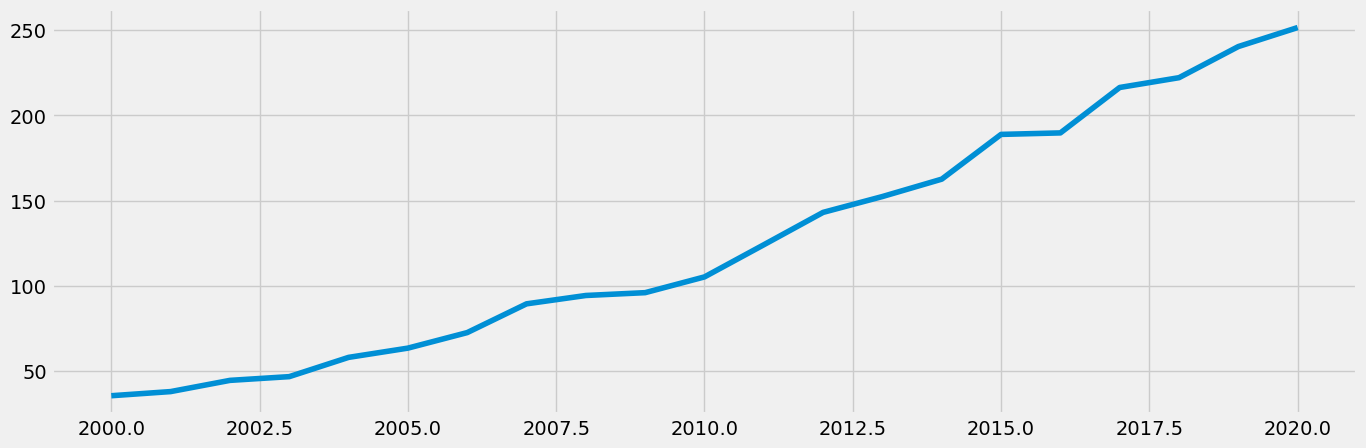

In [136]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [137]:
# Check for missing values (you shouldn't have any)

data_sub.isnull().sum() 

Electricity from renewables (TWh)    0
dtype: int64

In [138]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# No dups!

0

### 3. Time-series analysis: decomposition

In [139]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive', period=4)

In [140]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

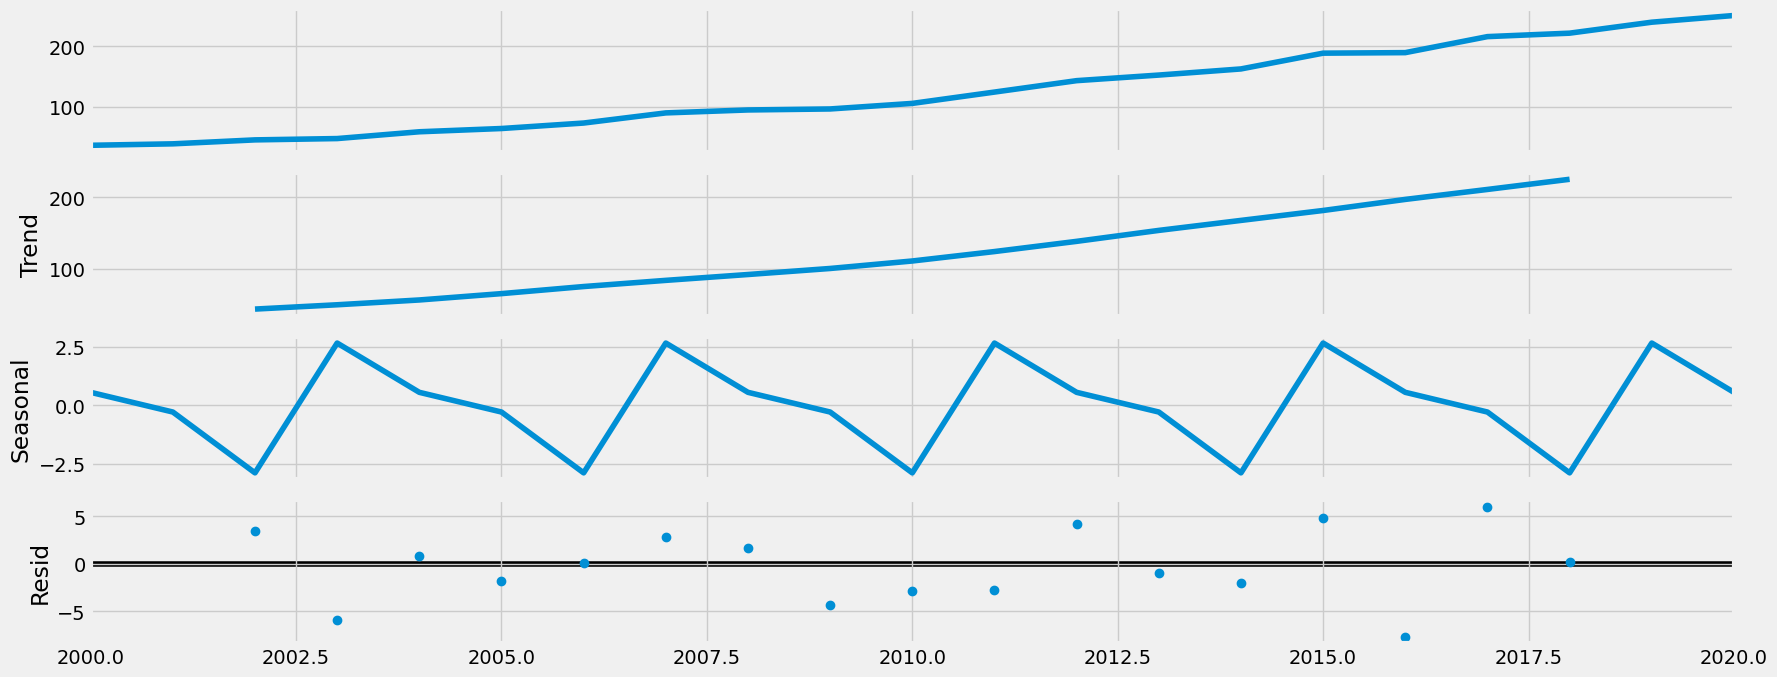

In [114]:
# Plot the separate components

decomposition.plot()
plt.show()

#### As the level and trend line appear to behave in a similar matter, there is probably not a lot of noise in the data. The tren gradually grows in a linear fashion. This means that the amount of electricity that comes from renewable sources continuously grows in Germany.  We can see clear pattern of seasonality in third component. The residual component is essentially what's left over in the data after removing the trend and seasonality. These fluctuations are small and do not exhibit a clear trend or seasonality, which is why we see very few dots in the residual line. It means that data is stable and predictable.

### 4. Testing for stationarity

In [142]:

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Electricity from renewables (TWh)'])

Dickey-Fuller Stationarity test:
Test Statistic                  2.434435
p-value                         0.999026
Number of Lags Used             1.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
Critical Value (10%)           -2.655520
dtype: float64


#### I am using a significance level of 5 percent. “Critical Value (5%)” in the results has a value of -3.031227. This is much smaller than the test statistic, which is 2.434435, which means that I can’t reject the null hypothesis.

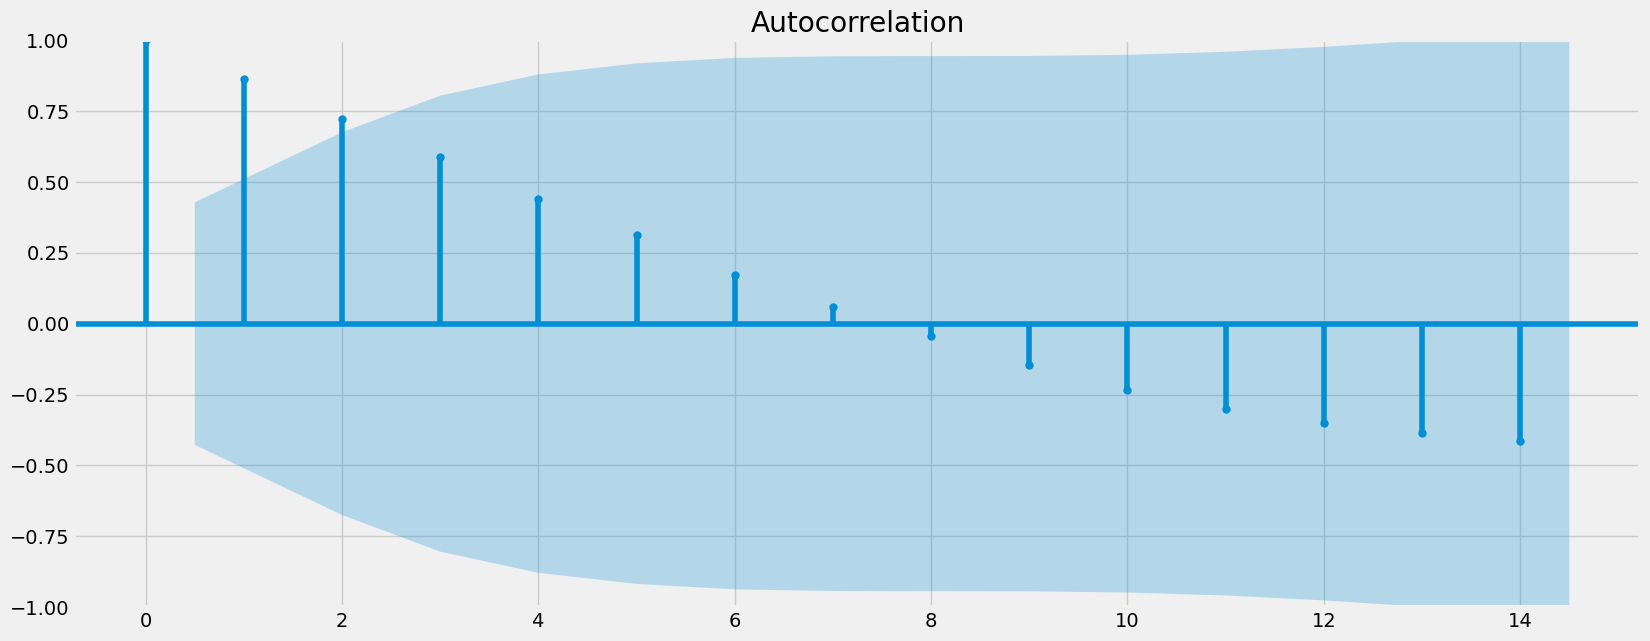

In [143]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

### 5. Stationarizing the Federal Reserve Economic Data

In [144]:
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [145]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [146]:
data_diff.head()

,Electricity from renewables (TWh)
Year,
2001,2.43
2002,6.58
2003,2.19
2004,11.30
2005,5.43


In [147]:
data_diff.columns

Index(['Electricity from renewables (TWh)'], dtype='object')

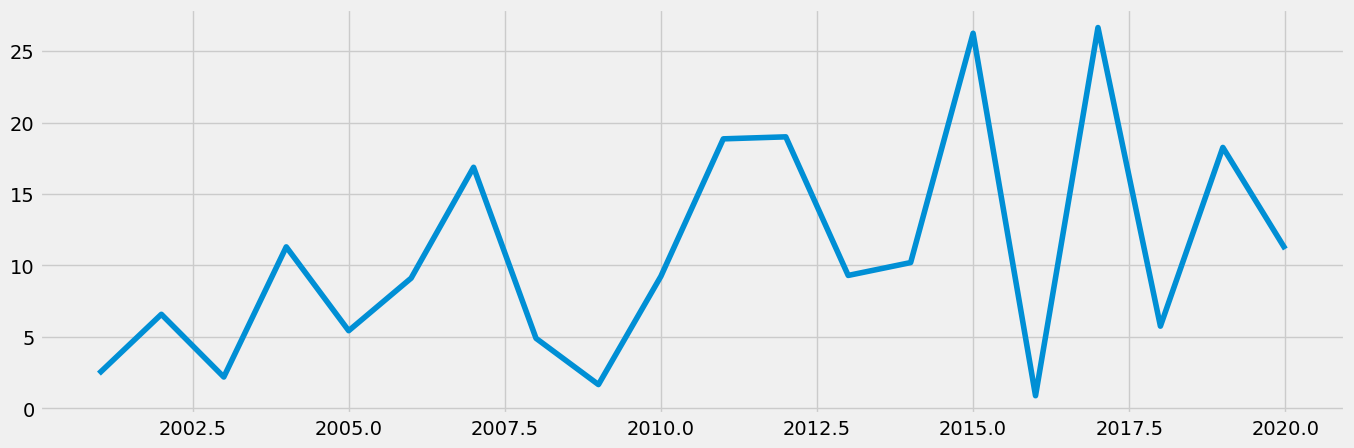

In [148]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [149]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -5.554056
p-value                         0.000002
Number of Lags Used             0.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
Critical Value (10%)           -2.655520
dtype: float64


#### #### “Critical Value (5%)” in the results has a value of -3.031227. After applying differencing technique, the Test Statistic value is -5.554056. Now, it is lower than Critical vlue, meaning that the data is statistical.

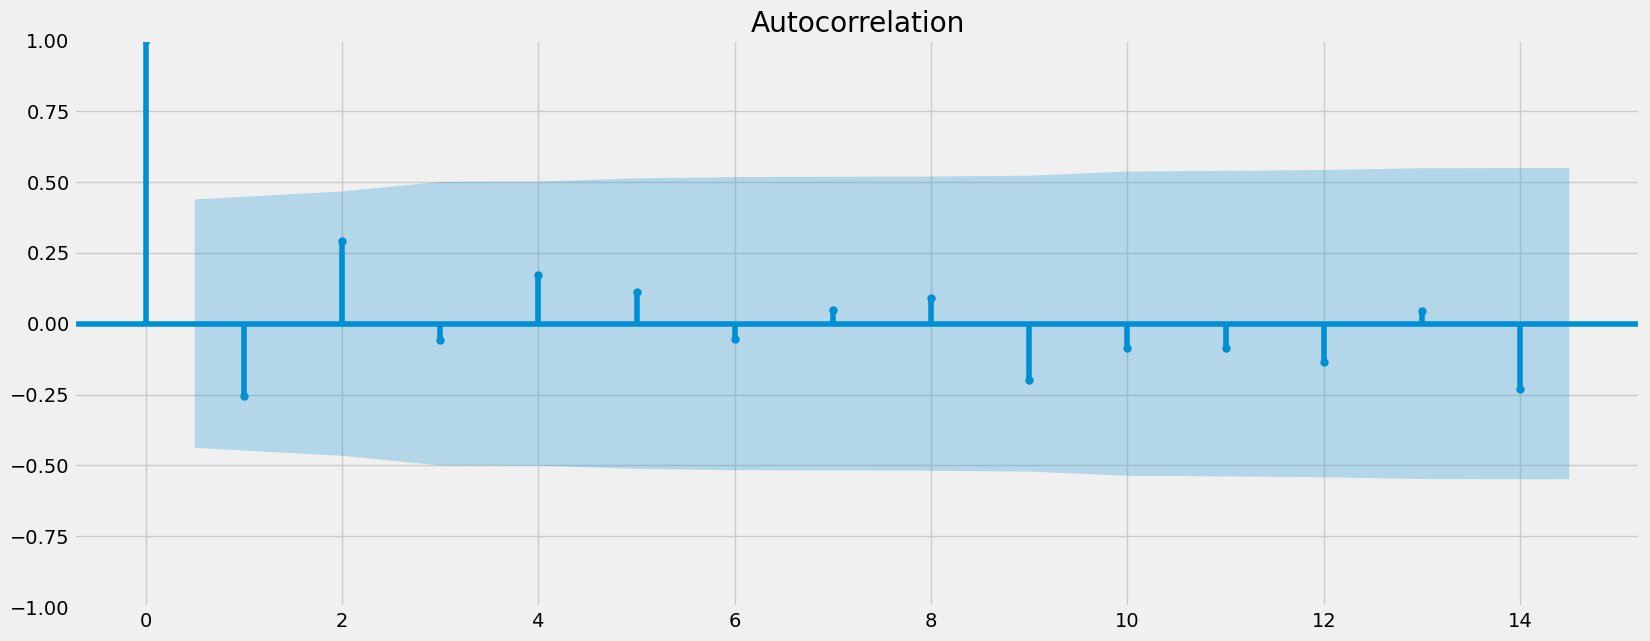

In [150]:
plot_acf(data_diff)
plt.show()